# Plotagem do Grafo

## Motivação 

O nosso objetivo neste projeto é construir um grafo, que sirva de modelo para representar todo o conjunto de transferências de jogadores entre times, que ocorreram no período de janeiro até agosto de 2025, permitindo uma profunda analise dos dados coletados e de suas possiveis implicações. 

## Metodologia

#### Dados

Como fonte  escolhemos a base de dados da ESPN, utilizamos as informações deles para gerar uma tabela, com a tabela, usamos a plataforma 'Sheety' e os dados coletados para construir uma API, que serviria como interface entre nosso código e os dados. Optamos por usar uma API, porque queríamos que qualquer membro do grupo pudesse ter acesso aos dados em qualquer lugar, a qualquer hora, com atualizações em tempo real, ou seja, quaisquer que alterações que fossem feitas na base de dados, permitiram que todos os programas que a usam, fossem igualmente impactados, deste modo garantimos que todos analisaríamos o mesmo conjunto de informações, evitando distorções em nossas observações.

#### Construção do Grafo

Para representar os vértices, decidimos tomar cada um dos 312 times de futebol mais um vértice especial que serviria para representar as transferências que vem de fora do cenário profissional ('sem-time'), mais tarde nos aprofundaremos no porque dessas escolha.
Já para as arestas, durante os primeiros testes da modelagem, observamos que em alguns casos, múltiplas transferências são registradas num mesmo sentido A para B, o que gerou um fervoroso debate em nosso grupo, poderíamos usar um multigrafo, que consideraria cada um desses casos como uma aresta a parte, ou poderíamos usar um grafo direcional simples, por um lado, tornamos nosso trabalho muito penoso sem muitos ganhos reais, pelo outro lado perderíamos precisão, como conciliar ambos?. Realizando algumas pesquisas sobre as ferramentas a nossa disposição, encontramos uma resposta, graças ao dinamismo de tipagems da linguagem 'Python', a biblioteca que estávamos usando (NetworkX), permite que suas instâncias recebam objetos de qualquer tipo, para além disso, o 'Python' também oferece um parâmetro no uso de funções chamado '**kwargs', que permite instanciamento de valores associando-os a chaves, esses valores podem  ser acessados posteriormente usando essa mesma chave a partir de uma instância do objeto, (no caso a partir da própria aresta). Sabendo disso, optamos por um grafo simples direcional, no qual as arestas não representariam as transferências em si, mas os sentidos no qual essas ocorrem. Para que isso fosse possível sem perdas, as arestas de nosso grafo receberam dois novos atributos, o primeiro, seria responsável por armazenar uma lista de dicionários, cada um contendo informações sobre as transferências que ocorrem naquele sentido, já o segundo, armazenaria a quantidade de transferências que ocorrem naquele sentido, permitindo fácil acesso a esse dado. Entretanto existe um problema nesta definição para as arestas, como representar essa maior tendência de movimento no sentido A para B em seus pesos, para que se possa gerar dados mais condizentes com a realidade, da perspectiva dos valores vinculados aos menores caminhos de nosso grafo?. A melhor escolha que encontramos, foi a de usar 1 sobre a quantidade de transferências daquela conexão como peso da própria conexão, deste modo, o peso das arestas diminui de maneira inversamente proporcional a quantidade de transferências registradas nela, aproximando nosso modelo da realidade.

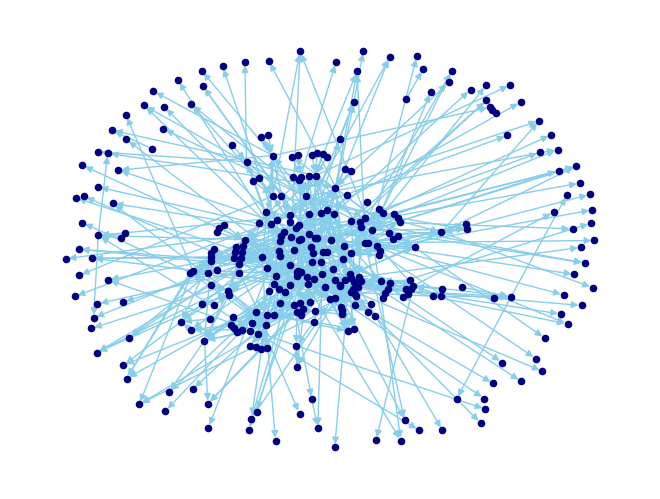

In [1]:
from networkx.algorithms import community
import networkx as nx

import matplotlib.pyplot as plt

from grafo import montar_grafo

grafo = montar_grafo()
layout = nx.spring_layout(grafo, k=0.1)
nx.draw(grafo, layout, node_size=20, node_color='navy', edge_color='skyblue', arrowsize=10)
plt.show()

# Métricas

## Análise do Grafo

Em uma análise preliminar do grafo, fica evidente que este se divide em dois grandes blocos, o que pode ser constatado na distribuição da centralidade de proximidade dos vértices. No primeiro se concentram vértices aparentemente mais relevantes, mais bem conectados entre si, que tendem a concentrar maiores centralidades de proximidade e intermediação, já o segundo, seria composto de vértices menos relevantes, dispostos quase que em orbita ao redor do bloco principal, os vertices desse bloco não ocupam papeis de centralidade entre as conexões, detem menores graus e em sua maioria se limitam a exercer função de começo e fim para pequenos caminhos.

#### Métricas do Grafo

A primeira relação entre as métricas que nos chamou atenção, foi a razão entre o tamanho do grafo e sua ordem, que é relativamente pequena, observamos que isso resulta em uma densidade e clusterização média do grafo iguais a valores muito pequenos, indicando que de fato, o conjunto de clubes observados não costuma realizar transferências em grandes volumes num periódo como o observado, visto que, muitas dessas acontecem sobre regimes contratuais de custos elevados, deste modo concluimos que nosso grafo possuí como caracteristica baixa conectividade entre seus vértices, e como o esperado, os times optam por manipular suas bases de atletas da maneira mais suscinta e eficiênte possível, dentro dos limites estabelecidos pelo contexto no qual estão inseridos, assim evitando gastos desnecessários. 

A fraca conectividade entre os vértices do grafo, também resultou em um diâmetro infinito, apesar de podermos recortar vertices menos relevantes afim de definir um valor aproximado para o diâmetro, optamos por não faze-lo, dado que uma grande parte da população analisada se configura no que definimos como clubes periféricos e desconsidera-los resultaria em um dado muito pouco pertinente, para além disso, o nosso  grafo, justamente por não ser fortemente conectado, é construído por um grande bloco subdividido em varios pequenos blocos, sendo que estes não necessariamente se conectam entre si, recortando os vértices menos relevantes, fatalmente nos limitariamos a analisar apenas o diametro do maior desses blocos menores.

## Métricas do Grafo

    Dentro das células abaixo, constam algumas das métricas extraídas do grafo.

In [3]:
print(f'CLUSTERIZAÇÃO DO GRAFO:...{nx.average_clustering(grafo)}')
print(f'DENSIDADE DO GRAFO:.......{nx.density(grafo)}')
print(f'TAMANHO DO GRAFO:.........{grafo.number_of_edges()}')
print(f'ORDEM DO GRAFO:...........{grafo.number_of_nodes()}')
print(f'DIAMETRO DO GRAFO: Infinito (Grafo não é fortemente conectado)')

CLUSTERIZAÇÃO DO GRAFO:...0.010317527390189091
DENSIDADE DO GRAFO:.......0.005201933316949291
TAMANHO DO GRAFO:.........508
ORDEM DO GRAFO:...........313
DIAMETRO DO GRAFO: Infinito (Grafo não é fortemente conectado)


## Métricas dos Elementos do Grafo

    Dentro das células abaixo, constam algumas métricas extraídas dos elementos do grafo

### Cálculo das Centralidades e Ranqueamento de Páginas

In [4]:
# DADOS DE CENTRALIDADE DO GRAFO
cent_vertices       = nx.degree_centrality(grafo)
cent_proximidade    = nx.closeness_centrality(grafo)
cent_intermediacao  = nx.betweenness_centrality(grafo)
cent_autovetor      = nx.eigenvector_centrality(grafo)
cent_out_dregree    = nx.out_degree_centrality(grafo)
cent_in_dregree     = nx.in_degree_centrality(grafo)

pagerank = nx.pagerank(grafo) # DADOS DE PAGERANK DO GRAFO

# ORGANIZAÇÃO DOS DADOS
cent_vertices       = dict(sorted(cent_vertices.items(), key=lambda item: item[1], reverse=True ))
cent_proximidade    = dict(sorted(cent_proximidade.items(), key=lambda item: item[1], reverse=True ))
cent_intermediacao  = dict(sorted(cent_intermediacao.items(), key=lambda item: item[1], reverse=True ))
cent_autovetor      = dict(sorted(cent_autovetor.items(), key=lambda item: item[1], reverse=True ))
cent_out_dregree    = dict(sorted(cent_out_dregree.items(), key=lambda item: item[1], reverse=True))
cent_in_dregree     = dict(sorted(cent_in_dregree.items(), key=lambda item: item[1], reverse=True))
pagerank            = dict(sorted(pagerank.items(), key=lambda item: item[1], reverse=True))

### Distribuição das Quantidades de Transferências por Sentido

Partindo de nossa definição para as arestas, julgamos como pertinente analisar a distribuição das frequências com os quais as transferências ocorrem nos diferentes sentidos, afim de que, com esse dados pudéssemos gerar leituras mas concisas das informações extraídas do grafo. Deste histograma concluímos que de fato, como esperado, os casos de múltiplas transferências são uma exceção, mas observamos um caso um tanto quanto chamativo, observamos que para duas arestas existem três registros, isso a principio nos chamou atenção, entretanto ambas as arestas estão vinculadas com o vértice especial que usamos justamente para representar a entrada de jogadores no cenário profissional (Sem Time), que por definição é o único cenário onde de fato, dadas as dimensões de nossa análise e seu recorte temporal, se torna plausível imaginar quantidades de transferências maiores que dois.

Para os outros casos onde existem duas transferências num mesmo sentido, e em que o vértice especial não faz parte das conexões, observamos um padrão, para todos esses, um mesmo jogador e transferido duas vezes num mesmo sentido, a grande questão é que as transferências acontecem sobre diferentes regimes, o jogador dentro de uma temporada pode ser emprestado e contratado para e por um mesmo clube, no que de maneira suscinta, poderíamos considerar como análogo a um "período de experimentação" ou "test drive". 

Disso concluímos que para os casos em que duas transferências ocorrem num mesmo sentido qualquer, não existe um real impacto na análise do grafo, visto que sua representatividade é pequena e no fundo não há maior tendência de múltiplos jogadores se moverem naquele sentido, salvo o caso contendo jogadores de fora do cenário profissional e outras exceções ainda menos relevantes.

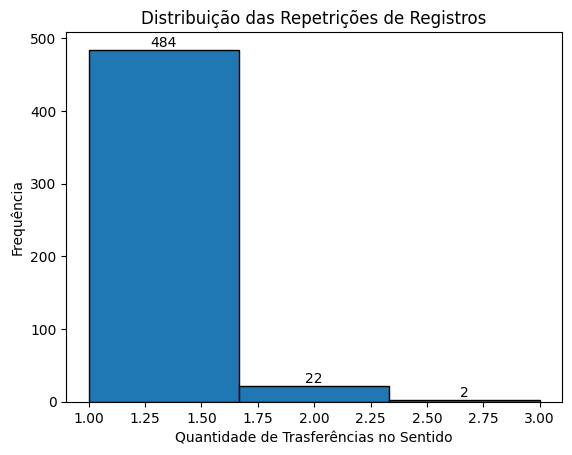

In [5]:
dados = []
for aresta in grafo.edges:
    dados.append(grafo[aresta[0]][aresta[1]]['quantidade_transferencias'])

valores ,colunas, barras = plt.hist(dados, bins=3, edgecolor='black')
plt.bar_label(barras, fontsize=10, color='black')
plt.title('Distribuição das Repetrições de Registros')
plt.xlabel('Quantidade de Trasferências no Sentido')
plt.ylabel('Frequência')
plt.show()

### Distribuição das Centralidade Grau dos Vértices (Absoluto)

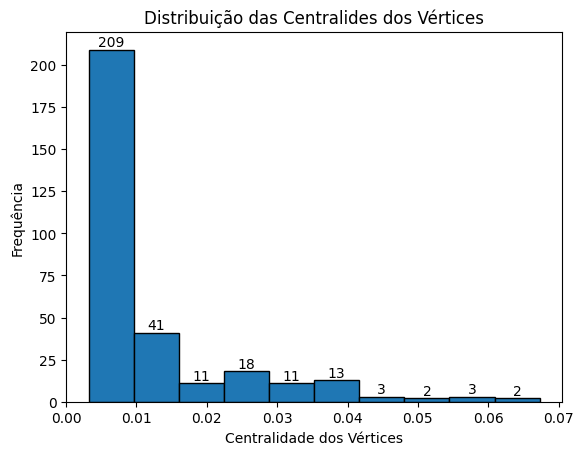

In [6]:
import matplotlib.pyplot as plt # Import para histogramas e gráficos

dados = []
for chave, valor in cent_vertices.items():
    dados.append(valor)

valores ,colunas, barras = plt.hist(dados, bins=10, edgecolor='black')
plt.bar_label(barras, fontsize=10, color='black')
plt.title('Distribuição das Centralides dos Vértices')
plt.xlabel('Centralidade dos Vértices')
plt.ylabel('Frequência')
plt.show()

### Histograma para Centralidade de Proximidade

Uma das características observadas na análise preliminar do grafo era a presença de dois grandes blocos estruturais. Essa hipótese é reforçada pelo histograma da centralidade de proximidade dos clubes, onde identificamos duas distribuições distintas: a primeira, majoritária, composta por vértices com valores muito baixos de centralidade, indicando baixa conectividade e possível isolamento; e a segunda, menor, composta por vértices com centralidades mais altas, sugerindo que esses clubes estão mais próximos entre si e formam uma subestrutura mais interconectada dentro do grafo.

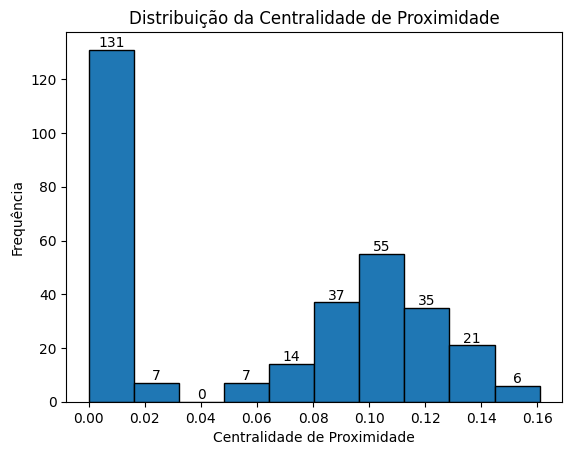

In [7]:
dados = []
for chave, valor in cent_proximidade.items():
    dados.append(valor)

valores ,colunas, barras = plt.hist(dados, bins=10, edgecolor='black')
plt.bar_label(barras, fontsize=10, color='black')
plt.title('Distribuição da Centralidade de Proximidade')
plt.xlabel('Centralidade de Proximidade')
plt.ylabel('Frequência')
plt.show()

### Distribuição da Centralidade de Intermediação

A distribuição da centralidade de intermediação apresenta um padrão assimétrico e fortemente concentrado em valores muito baixos, lembrando uma distribuição com cauda longa, típica de fenômenos que seguem leis de potência. Observa-se que a vasta maioria dos clubes possui valores inferiores a 0.01, enquanto apenas poucos vértices apresentam centralidades ligeiramente superiores. Isso indica que, no contexto analisado, os clubes raramente atuam como pontes relevantes entre diferentes grupos de times no grafo. Essa configuração pode ser explicada pelo funcionamento do mercado de transferências, onde as movimentações entre ligas de diferentes continentes são mais restritas do que o imaginado no senso comum. Assim, a centralidade de intermediação não se mostra uma métrica determinante para identificar os principais exportadores de talentos neste cenário.

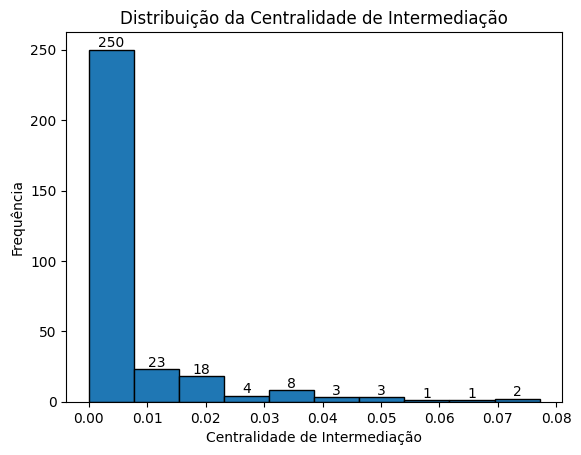

In [8]:
dados = []
for chave, valor in cent_intermediacao.items():
    dados.append(valor)

valores ,colunas, barras = plt.hist(dados, bins=10, edgecolor='black')
plt.bar_label(barras, fontsize=10, color='black')
plt.title('Distribuição da Centralidade de Intermediação')
plt.xlabel('Centralidade de Intermediação')
plt.ylabel("Frequência")
plt.show()

### Distribuição da Centralidade de Autovetor

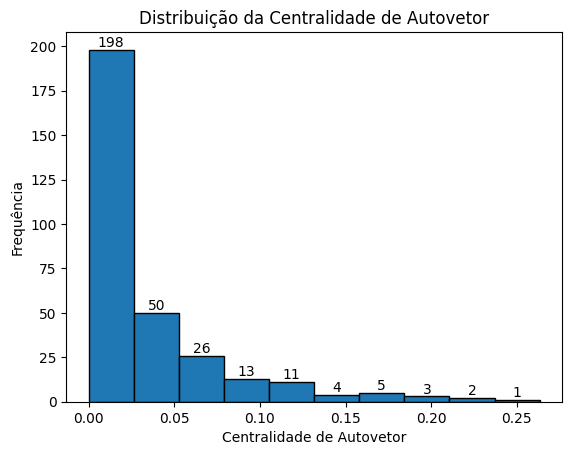

In [9]:
dados = []
for chave, valor in cent_autovetor.items():
    dados.append(valor)

valores ,colunas, barras = plt.hist(dados, bins=10, edgecolor='black')
plt.bar_label(barras, fontsize=10, color='black')
plt.title('Distribuição da Centralidade de Autovetor')
plt.xlabel('Centralidade de Autovetor')
plt.ylabel('Frequência')
plt.show()

### Distribuição da Centralidade de Grau de Saída

A Fig. (X) refere-se a distribuição da centralidade dos graus de saídas dos vértices, dado importante na definição dos times exportadores e intermediários, assim como as demais, essa métrica apresenta uma tendencia na concentração dos maiores valores para a  uma pequena parcela da população estudada, o que aponta para uma provável existência de clubes que exercem posições centrais na perspectiva de exportação de talentos, dos quais descaremos aqueles com graus maiores que 6, um recorte com 17 membros que representa cerca de 5.43% dos nós de nosso grafo.

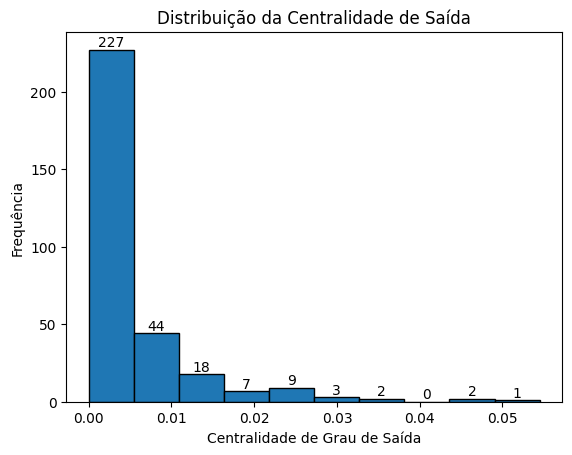

In [10]:
dados = []
for chave, valor in cent_out_dregree.items():
    dados.append(valor)

valores ,colunas, barras = plt.hist(dados, bins=10, edgecolor='black')
plt.bar_label(barras, fontsize=10, color='black')
plt.title('Distribuição da Centralidade de Saída')
plt.xlabel('Centralidade de Grau de Saída')
plt.ylabel('Frequência')
plt.show()

### Distribuição da Centralidade do Grau de Entrada

De modo semelhante, o mesmo cenário se repete para a distribuição dos graus de entrada, conforme o histograma da Fig (X), os valores se concentram em pequenos grupos. Assim como fizemos anteriormente, destacaremos aqueles que possuem graus maiores que 5, os 19 times dentro desse grupo, representam 6.07% de nosso grafo, para os times de carater exportador, esses podem ser ditos como os mais relevantes ou mais atuantes.

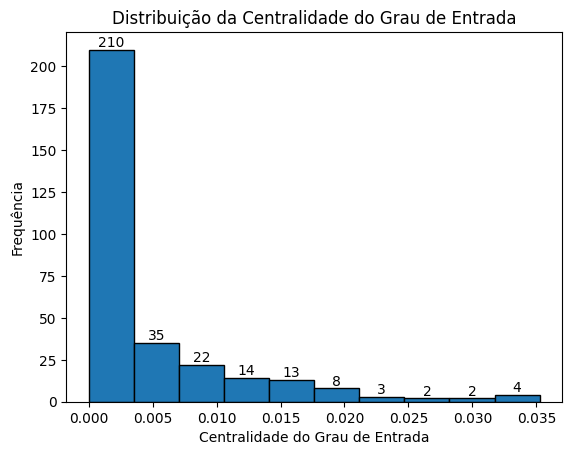

In [17]:
dados = []
for chave, valor in cent_in_dregree.items():
    dados.append(valor)

valores ,colunas, barras = plt.hist(dados, bins=10, edgecolor='black')
plt.bar_label(barras, fontsize=10, color='black')
plt.title('Distribuição da Centralidade do Grau de Entrada')
plt.xlabel('Centralidade do Grau de Entrada')
plt.ylabel('Frequência')
plt.show()

### Distribuição do Ranqueamento de Páginas

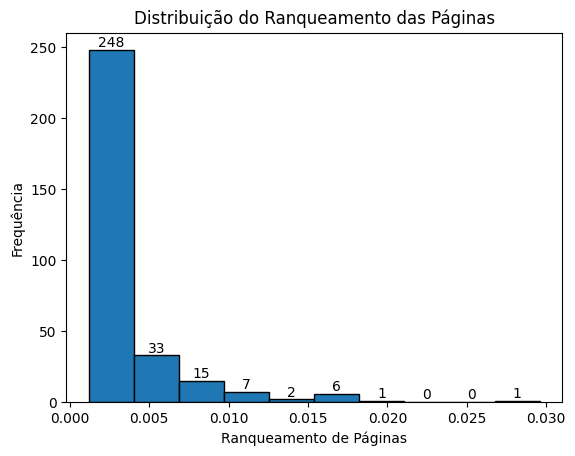

In [20]:
dados = []
for chave, valor in pagerank.items():
    dados.append(valor)

valores ,colunas, barras = plt.hist(dados, bins=10, edgecolor='black')
plt.bar_label(barras, fontsize=10, color='black')
plt.title('Distribuição do Ranqueamento das Páginas')
plt.xlabel('Ranqueamento de Páginas')
plt.ylabel('Frequência')
plt.show()

## Distribuição das Métricas entre os Vértices

### Tabelas para Grau de Saída

Quantidade de Times com grau de saída >= 7: 17
Porcentagem que esse grupo representa: 5.43%


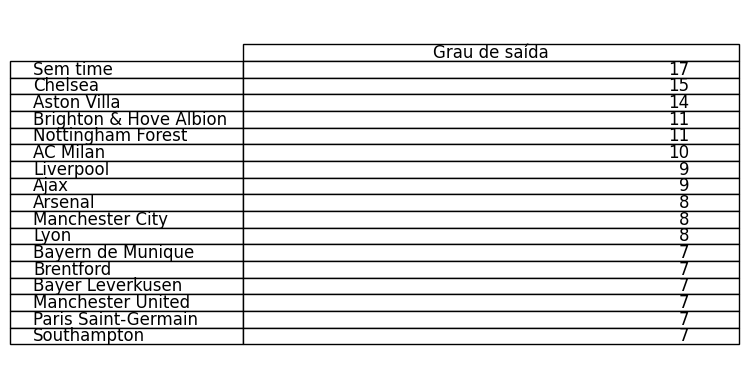

In [13]:
vertices_graus  = {}

labels_colunas  = ['Grau de saída']
valor_colunas   = []
valor_linhas    = []

minimo = int(input('Digite qual deve ser o valor mínimo para a tabela:'))

for vertice in grafo.nodes:
    if grafo.out_degree(vertice) >= minimo:
        vertices_graus[vertice] = grafo.out_degree(vertice)

vertices_graus = dict(sorted(vertices_graus.items(), key=lambda item: item[1], reverse=True ))
print(f'Quantidade de Times com grau de saída >= {minimo}: {len(vertices_graus.items())}')
print(f'Porcentagem que esse grupo representa: {(len(vertices_graus.items()) / 313) * 100:.2f}%')

for vertice, grau in vertices_graus.items():
    valor_linhas.append(vertice)
    valor_colunas.append([grau])

fig, ax = plt.subplots()
ax.axis('off')

table = ax.table(cellText=valor_colunas, colLabels=labels_colunas, rowLabels=valor_linhas, loc='center')
table.set_fontsize(12)

plt.show()


### Tabelas para Grau de Entrada

Quantidade de Times com grau de entrada >= 6: 19
Porcentagem que esse grupo representa: 6.07%


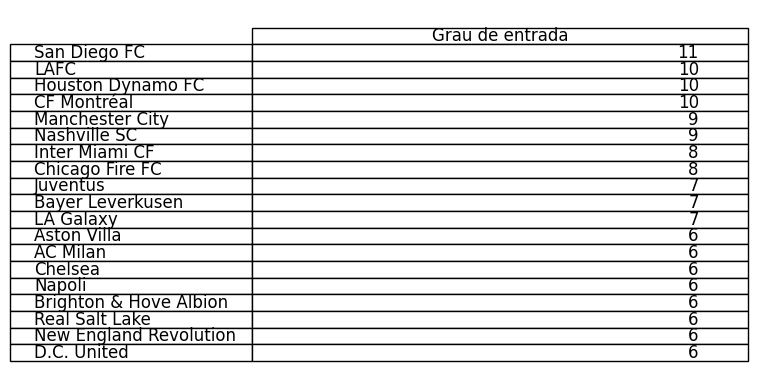

In [23]:
vertices_graus  = {}

labels_colunas  = ['Grau de entrada']
valor_colunas   = []
valor_linhas    = []

minimo = int(input('Digite qual deve ser o valor mínimo para a tabela:'))

for vertice in grafo.nodes:
    if grafo.in_degree(vertice) >= minimo:
        vertices_graus[vertice] = grafo.in_degree(vertice)

vertices_graus = dict(sorted(vertices_graus.items(), key=lambda item: item[1], reverse=True ))
print(f'Quantidade de Times com grau de entrada >= {minimo}: {len(vertices_graus.items())}')
print(f'Porcentagem que esse grupo representa: {(len(vertices_graus.items()) / 313) * 100:.2f}%')

for vertice, grau in vertices_graus.items():
    valor_linhas.append(vertice)
    valor_colunas.append([grau])

fig, ax = plt.subplots()
ax.axis('off')

table = ax.table(cellText=valor_colunas, colLabels=labels_colunas, rowLabels=valor_linhas, loc='center')
table.set_fontsize(12)

plt.show()

### Tabelas para Grau de Centralidade de Intermediação (Betweenness)

Quantidade de Times com Centralidade de Intermediação >= 0.03: 19
Porcentagem que esse grupo representa: 6.07%


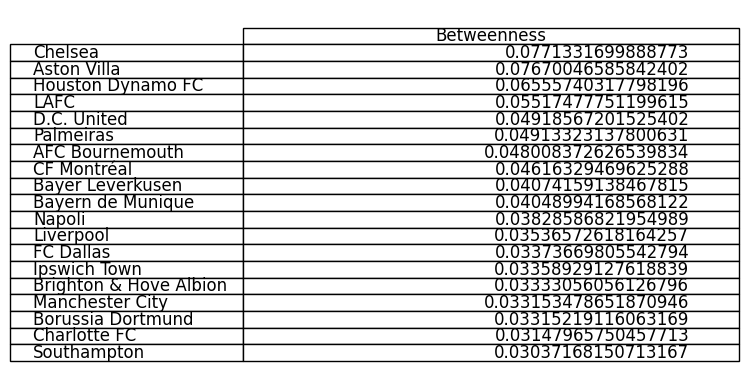

In [16]:
vertices_centralidades  = nx.betweenness_centrality(grafo)
vertices_centralidades = dict(sorted(vertices_centralidades.items(), key=lambda item: item[1], reverse=True ))

labels_colunas  = ['Betweenness']
valor_colunas   = []
valor_linhas    = []

minimo = float(input('Digite qual deve ser o valor mínimo para a tabela:'))

for vertice, centralidade in vertices_centralidades.items():
    if centralidade >= minimo:
        valor_linhas.append(vertice)
        valor_colunas.append([centralidade])

print(f'Quantidade de Times com Centralidade de Intermediação >= {minimo}: {len(valor_linhas)}')
print(f'Porcentagem que esse grupo representa: {(len(valor_linhas) / 313) * 100:.2f}%')

fig, ax = plt.subplots()
ax.axis('off')

table = ax.table(cellText=valor_colunas, colLabels=labels_colunas, rowLabels=valor_linhas, loc='center')
table.set_fontsize(12)

plt.show()

## Comunidades do Grafo 


### Divisões pelo método de Louvain

MODULARIDADE DA DIVISÃO:...0.6242823366282721
QUANTIDADE DE CLUSTERS:....15
ASSORTIVIDADE DO GRAFO:...-0.277338698439003
turquoise, turquoise, red, red, orange, orange, orange, orange, teal, blue, teal, magenta, orange, teal, black, black, black, olive, turquoise, magenta, brown, brown, orange, yellow, orange, pink, green, green, black, black, magenta, orange, magenta, orange, olive, red, magenta, olive, olive, black, black, purple, yellow, orange, red, orange, olive, olive, red, red, red, pink, teal, teal, purple, yellow, teal, orange, orange, green, red, black, teal, yellow, magenta, olive, olive, turquoise, pink, olive, magenta, blue, yellow, green, green, blue, pink, magenta, olive, blue, navy, green, brown, teal, teal, teal, yellow, teal, green, blue, blue, teal, blue, teal, brown, teal, turquoise, teal, teal, green, teal, brown, green, purple, purple, teal, purple, yellow, yellow, green, green, purple, teal, teal, teal, teal, green, turquoise, green, green, green, green, teal, na

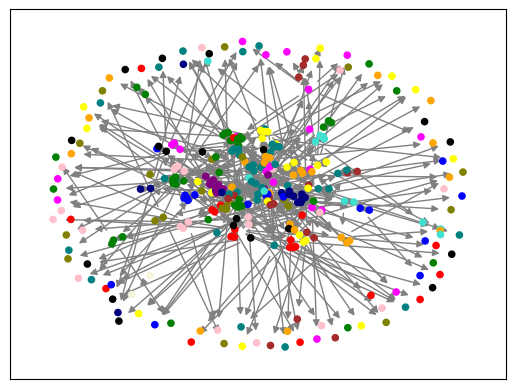

In [ ]:
import numpy as np

comunidades_louvain = community.louvain_communities(grafo)
ordem_grafo         = list(grafo.nodes())

cores = [
    'red',   
    'orange', 
    'yellow', 
    'olive',  
    'green',   
    'turquoise',
    'teal',     
    'blue', 
    'navy',     
    'purple',  
    'magenta',
    'pink',   
    'brown',    
    'beige',     
    'black'      
        ]

print(f'MODULARIDADE DA DIVISÃO:...{nx.community.modularity(grafo, comunidades_louvain)}')
print(f'QUANTIDADE DE CLUSTERS:....{len(comunidades_louvain)}')
print(f'ASSORTIVIDADE DO GRAFO:...{nx.degree_assortativity_coefficient(grafo)}')

colors_sort = {}
for elemento in ordem_grafo:
    for i in range(len(comunidades_louvain)):
        if elemento in comunidades_louvain[i]:
            colors_sort[elemento] = cores[i]
            break

layout = nx.spring_layout(grafo)

# print(", ".join(grafo.nodes()))
# print(", ".join(list(colors_sort.keys())))
print(", ".join(list(colors_sort.values())))

nx.draw_networkx_nodes(grafo, layout, node_color=list(colors_sort.values()), node_size=20)
nx.draw_networkx_edges(grafo, layout, edge_color='gray', arrowsize=10)
plt.show()